In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns=999

In [2]:
df = pd.read_csv('happiness_data_2015_to_2019.csv', index_col=0)

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,2015


# **Understanding Data**

### **Context**

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations, and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields - economics, psychology, survey analysis, national statistics, health, public policy, and more - describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### **Content**

The happiness scores and rankings use data from the *Gallup World Poll*. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril Ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013 - 2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors - economic production, social support, life expectancy, freedom to make life choices, absence of corruption, and generosity - contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world's lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

The following columns: GDP per capita, Social support, Healthy life expectancy, Freedom (Freedom to make life choices), Trust (Government corruption) describe the extent to which these factors contribute in evaluating the happiness in each country.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 148
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        763 non-null    object 
 1   Region                         763 non-null    object 
 2   Happiness Rank                 763 non-null    int64  
 3   Happiness Score                763 non-null    float64
 4   Economy (GDP per Capita)       763 non-null    float64
 5   Social support                 763 non-null    float64
 6   Health (Life Expectancy)       763 non-null    float64
 7   Freedom                        763 non-null    float64
 8   Generosity                     763 non-null    float64
 9   Trust (Government Corruption)  762 non-null    float64
 10  Dystopia Residual              464 non-null    float64
 11  Year                           763 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 7

In [5]:
df['Country'].nunique()

164

In [6]:
# df['Country'].unique()

In [7]:
df[(df['Country'] == 'Somaliland Region') | (df['Country'] == 'Somaliland region')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.18847,0.95152,0.43873,0.46582,0.50318,0.39928,2.11032,2015
96,Somaliland Region,Sub-Saharan Africa,97,5.057,0.25558,0.75862,0.33108,0.39130,0.51479,0.36794,2.43801,2016


Based on the initial data, total country listed supposed to be a total of 163, but it's 164 instead. Checking back to the data, turns out 'Somaliland Region' mentioned twice, one with capital 'R' and another with lower 'r'.

In [8]:
# null data from 'Dystopia Residual' column:

print(f"Null data percentage from 'Dystopia Residual' column: {(df['Dystopia Residual'].isnull().sum()/len(df)*100).round(2)}%")
print(f"Non-null data percentage from 'Dystopia Residual' column: {100-(df['Dystopia Residual'].isnull().sum()/len(df)*100).round(2)}%")

Null data percentage from 'Dystopia Residual' column: 39.19%
Non-null data percentage from 'Dystopia Residual' column: 60.81%


Since there is too many null data (almost 40% of total data) in column 'Dystopia Residual', this column is deleted to avoid bias in analysis. This considered not affecting too much in data analysis, since Dystopia Residual have no impact on the total score reported for each country.

In [9]:
df.drop(columns='Dystopia Residual', inplace=True)

In [10]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [11]:
df.rename(columns={'Economy (GDP per Capita)': 'GDP per Capita', 'Health (Life Expectancy)': 'Healthy life expectancy', 'Freedom': 'Freedom to make life choices', 'Trust (Government Corruption)': 'Perceptions of corruption'}, inplace=True)

In [12]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 148
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       763 non-null    object 
 1   Region                        763 non-null    object 
 2   Happiness Rank                763 non-null    int64  
 3   Happiness Score               763 non-null    float64
 4   GDP per Capita                763 non-null    float64
 5   Social support                763 non-null    float64
 6   Healthy life expectancy       763 non-null    float64
 7   Freedom to make life choices  763 non-null    float64
 8   Generosity                    763 non-null    float64
 9   Perceptions of corruption     762 non-null    float64
 10  Year                          763 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 71.5+ KB


There is only one null value, and it's in 'Perceptions of corruption' column. Since it's only one null value, we will try to fill it with a value that's considered to fit the data well, based on other columns.

## Handling null value

In [14]:
df[df['Perceptions of corruption'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
19,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


Let's see other data from the same Country; United Arab Emirates, from other years.

In [15]:
df[df['Country'] == 'United Arab Emirates']

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.427270,1.12575,0.809250,0.641570,0.264280,0.38583,2015
27,United Arab Emirates,Middle East and Northern Africa,28,6.573,1.573520,0.87114,0.729930,0.562150,0.265910,0.35561,2016
19,United Arab Emirates,Middle East and Northern Africa,21,6.648,1.626343,1.26641,0.726798,0.608345,0.360942,0.32449,2017
19,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096000,0.77600,0.670000,0.284000,0.186000,NaN,2018
19,United Arab Emirates,Middle East and Northern Africa,21,6.825,1.503000,1.31000,0.825000,0.598000,0.262000,0.18200,2019


All data shown on table above are from the same dountry: United Arab Emirates, annually from 2015 - 2019. Analysing solely from 'Perceptions of corruption' column, it can be seen that the tendency of data is decreased, with relatively having negative regression over years. Perception of corruption scored 0.38, 0.35, and 0.32 from 2015 to 2017, respectively. 

In [16]:
df[df['Country'] == 'United Arab Emirates']['Perceptions of corruption'].interpolate()
# df[df['Country'] == 'United Arab Emirates']['Perceptions of corruption'].interpolate()

19    0.385830
27    0.355610
19    0.324490
19    0.253245
19    0.182000
Name: Perceptions of corruption, dtype: float64

In [17]:
value_nan = df[df['Country'] == 'United Arab Emirates']['Perceptions of corruption'].interpolate(method='linear').iloc[3]
value_nan

0.25324478185176846

In [18]:
df[df['Country'] == 'United Arab Emirates'] = df[df['Country'] == 'United Arab Emirates'].fillna(value=value_nan)

In [19]:
df[df['Country'] == 'United Arab Emirates']

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.427270,1.12575,0.809250,0.641570,0.264280,0.385830,2015
27,United Arab Emirates,Middle East and Northern Africa,28,6.573,1.573520,0.87114,0.729930,0.562150,0.265910,0.355610,2016
19,United Arab Emirates,Middle East and Northern Africa,21,6.648,1.626343,1.26641,0.726798,0.608345,0.360942,0.324490,2017
19,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096000,0.77600,0.670000,0.284000,0.186000,0.253245,2018
19,United Arab Emirates,Middle East and Northern Africa,21,6.825,1.503000,1.31000,0.825000,0.598000,0.262000,0.182000,2019


In [20]:
df.isnull().sum()

Country                         0
Region                          0
Happiness Rank                  0
Happiness Score                 0
GDP per Capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Year                            0
dtype: int64

================================================================================

# **Exploratory Data Analysis**

In [21]:
desc = []

for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum())/(len(df)))*100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [22]:
dfDesc = pd.DataFrame(desc, columns=['dataFeatures', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'])
dfDesc

,dataFeatures,dataType,null,nullPercentage,unique,uniqueSample
0,Country,object,0,0.0,164,"[Iceland, Montenegro]"
1,Region,object,0,0.0,10,"[Eastern Asia, North America]"
2,Happiness Rank,int64,0,0.0,158,"[17, 14]"
3,Happiness Score,float64,0,0.0,700,"[4.31500005722046, 7.494]"
4,GDP per Capita,float64,0,0.0,729,"[0.256, 0.59448]"
5,Social support,float64,0,0.0,715,"[0.79624, 1.54896914958954]"
6,Healthy life expectancy,float64,0,0.0,689,"[0.40132, 0.594]"
7,Freedom to make life choices,float64,0,0.0,682,"[0.45727, 0.232]"
8,Generosity,float64,0,0.0,654,"[0.15775999999999998, 0.059]"
9,Perceptions of corruption,float64,0,0.0,624,"[0.09719, 0.04741]"


**Columns with Numerical Data:**
- Happiness Rank
- Happiness Score
- GDP per capita
- Social Support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption
- Year

**Columns with Categorical Data:**
- Country
- Region

In [23]:
df[(df['Country'] == 'Somaliland Region') | (df['Country'] == 'Somaliland region')]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.18847,0.95152,0.43873,0.46582,0.50318,0.39928,2015
96,Somaliland Region,Sub-Saharan Africa,97,5.057,0.25558,0.75862,0.33108,0.39130,0.51479,0.36794,2016


In [24]:
df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

## **Insight from prepared-Dataset**

Dataset represents factors considered affecting overall happiness of country's citizen, on 163 coutries (Somaliland Region mentioned twice/differenty, with and without capital R in word 'Region') in 10 Region across the world, from year 2015 - 2019.

There are more countries listed in year 2016's data, which are:
- Belize
- Puerto Rico
- Somalia
- Namibia, and
- South Sudan

and Somaliland Region considered 2 different countries, as 'Somaliland Region' and 'Somaliland region'

In [25]:
df[(df['Country'] == 'Belize') | (df['Country'] == 'Puerto Rico') | (df['Country'] == 'Somalia') | (df['Country'] == 'Namibia') | (df['Country'] == 'South Sudan')]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
14,Puerto Rico,Latin America and Caribbean,15,7.039,1.35943,1.08113,0.77758,0.46823,0.22202,0.12275,2016
51,Belize,Latin America and Caribbean,52,5.956,0.87616,0.68655,0.45569,0.51231,0.23684,0.10771,2016
75,Somalia,Sub-Saharan Africa,76,5.440,0.00000,0.33613,0.11466,0.56778,0.27225,0.31180,2016
112,Namibia,Sub-Saharan Africa,113,4.574,0.93287,0.70362,0.34745,0.48614,0.07795,0.10398,2016
142,South Sudan,Sub-Saharan Africa,143,3.832,0.39394,0.18519,0.15781,0.19662,0.25899,0.13015,2016


**That is why in 'Country' column, the unique data is 164, while unique data for 'Happiness Rank' is 158.**

## **Objectives**

Objectives of analysis are:
1. Find out which factors really affecting happiness score of a country;
2. Elaborate analyisis on countries having high Rank in Happiness Score and countries that don't, also elaborate in attribute region
4. Determine what efforts need to be done for countries having low happiness score

Therefore, the target column is: *Happiness Score*

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,763.0,78.418087,45.290048,1.000,39.000000,78.000000,118.000000,158.000000
Happiness Score,763.0,5.387557,1.129230,2.693,4.508500,5.324000,6.208500,7.769000
GDP per Capita,763.0,0.919569,0.404454,0.000,0.612965,0.985000,1.239710,2.096000
Social support,763.0,1.078899,0.330117,0.000,0.870456,1.125000,1.330475,1.644000
Healthy life expectancy,763.0,0.615256,0.246577,0.000,0.446000,0.650785,0.808579,1.141000
Freedom to make life choices,763.0,0.410528,0.152308,0.000,0.309205,0.431000,0.531000,0.724000
Generosity,763.0,0.218883,0.123208,0.000,0.129881,0.201964,0.279960,0.838075
Perceptions of corruption,763.0,0.125507,0.106229,0.000,0.054000,0.090000,0.155692,0.551910
Year,763.0,2016.967235,1.418929,2015.000,2016.000000,2017.000000,2018.000000,2019.000000


# 1. Analyisis on Features Having Correlation with Country's Happiness Score

In this section, the dataset will be analysed particularly on target column (Happiness Score); its statistic description and how other features correlated with Happiness Score.

## ** pairplot **

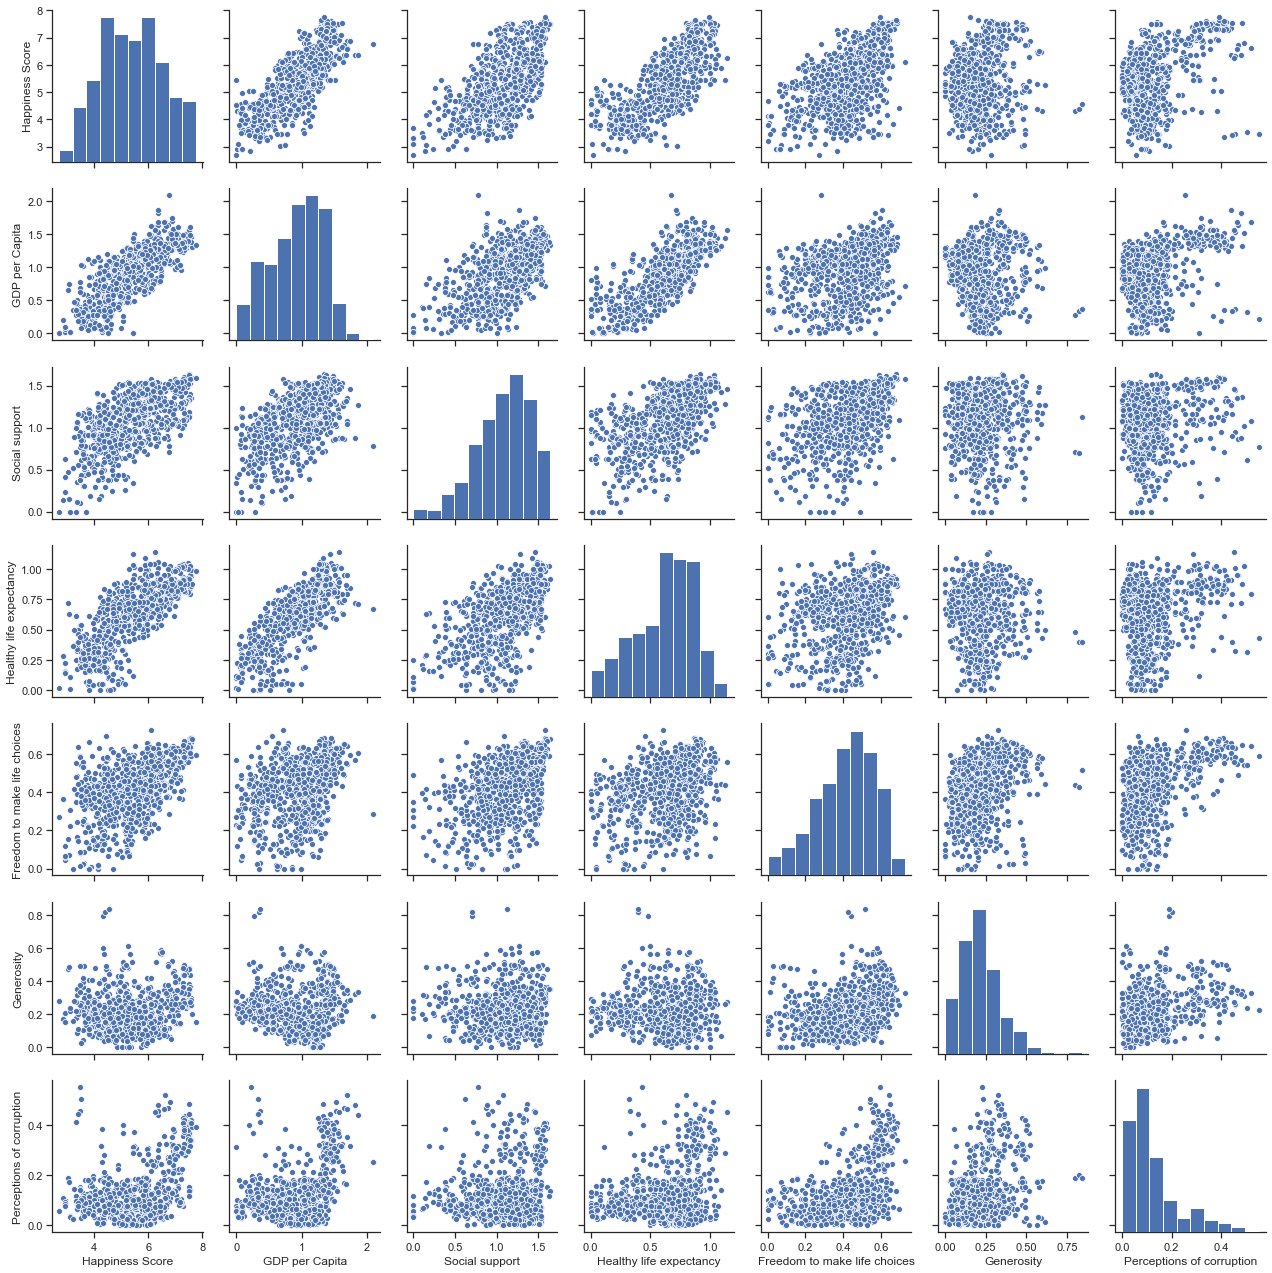

In [140]:
sns.set(style='ticks', color_codes='RdBu')
sns.pairplot(df, vars=['Happiness Score', 'GDP per Capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])

plt.show()

### **Insights**

Roughly, it can be seen that there is a correlation between happiness score and GDP per capita, while GDP per capita has a correlation with healthy life expectancy. Therefore, healthy life expectancy also has correlation with happiness score. While social support factor seems to also have correlation with happiness score, the strength of correlation between these factors later can be analysed with heatmap correlation.

## ** Happiness Score **

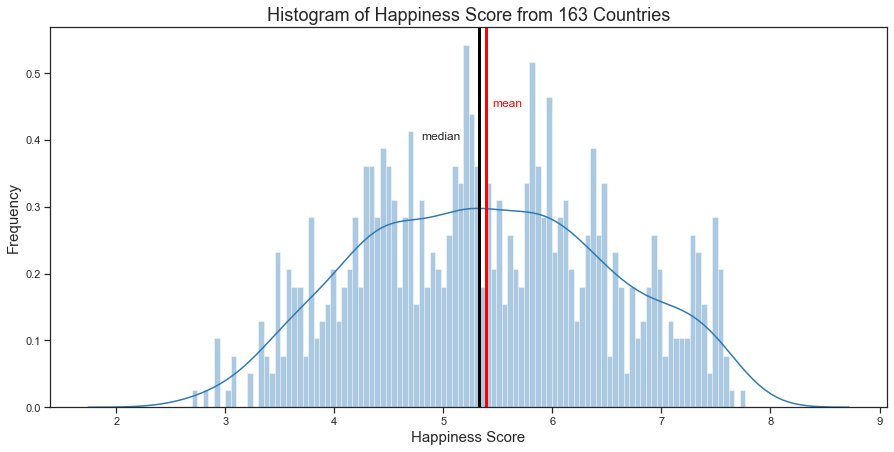

In [28]:
plt.figure(figsize=(15, 7))
sns.distplot(df['Happiness Score'], bins=100)
plt.title('Histogram of Happiness Score from 163 Countries', size=18)
plt.xlabel('Happiness Score', size=15)
plt.ylabel('Frequency', size=15)
plt.axvline(x=df['Happiness Score'].mean(), linewidth=3, color = 'r') 
plt.axvline(x=df['Happiness Score'].median(), linewidth=3, color = 'k')
plt.text(4.8, 0.4, 'median', fontsize=12)
plt.text(5.45, 0.45, 'mean', fontsize=12, color='r')
plt.show()

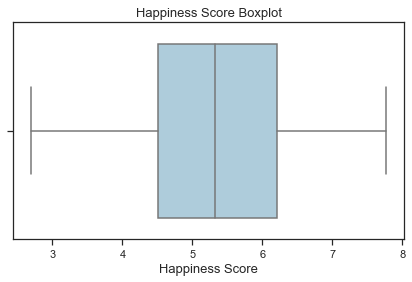

In [29]:
plt.figure(figsize=(7, 4))

sns.boxplot(df['Happiness Score'], palette='Paired')
plt.xlabel('Happiness Score', fontsize=13)
plt.title('Happiness Score Boxplot', size=13)
plt.show()

### **Insights**

There is no outliers in Happiness Score data, with minimum score of 2.693 and maximum score of 7.769, the value for mean and median are close together, they are 5.38 and 5.32, respectively.

## ** Happiness Score vs GDP per Capita **

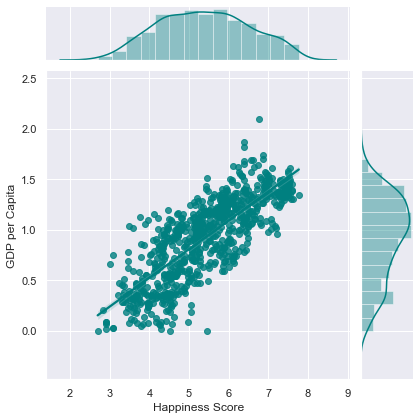

In [30]:
sns.set_style('darkgrid')

g = sns.jointplot('Happiness Score', 'GDP per Capita', data=df,
                 kind='reg', color='teal')

plt.show()

### **Insights**

There is relatively strong positive correlation between Happiness Score and GDP per Capita, where higher GDP per Capita corresponds with higher Happiness Score.

## ** Happiness Score vs Healthy Life Expectancy **

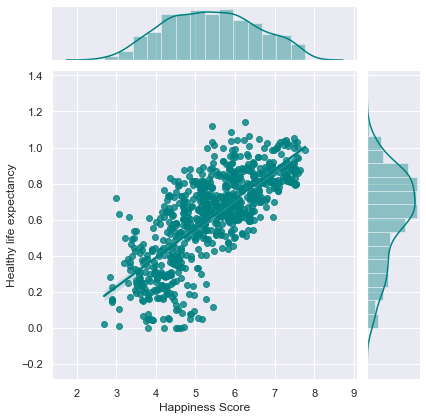

In [31]:
sns.set_style('darkgrid')

g = sns.jointplot('Happiness Score', 'Healthy life expectancy', data=df,
                 kind='reg', color='teal')

plt.show()

### **Insights**

There is also relatively strong positive correlation between Happiness Score and Healthy life expectancy, where higher Healthy life expectancy corresponds with higher Happiness Score.

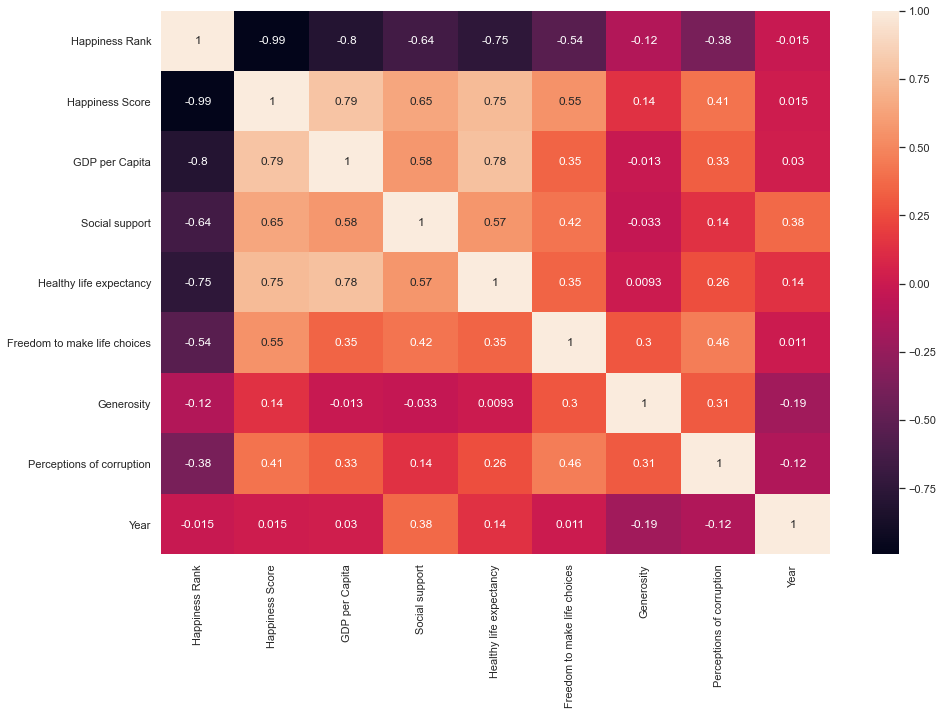

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)


plt.xticks(rotation = 90)
plt.show()

## **Insights**

Heatmap correlation is based on Pearson method. Features having correlation to each other represents with scores near to 1 or -1. Positive value means correlation is positive, that higher value of one feature generates higher value to another feature, and vice versa. While negative value means each features are in contrary with each other; the higher value of one feature resulting lower value to another.


Feature having correlation score of more than 0.5 with Happiness Score are:
- Freedom to make life choices (0.55)
- Social support (0.65)
- Healthy life expectancy (0.75)
- GDP per Capita (0.79)

All features mentioned above are positively correlated with happiness score.

This analysis answers the first objective of analysis mentioned earlier; features having correlation with Happiness Score of a country are: GDP per Capita, Healthy life expectancy, Social support, and Freedom to make life choices. All features are positively correlated with overall Happiness Score.

==========================================================================================================================

# 2. Analysis on Countries Having High Happiness Score

Analyisis will be done by first grouping Happiness Score by its quantile. Countries having high Happiness Score considered to be in quantile 3, which then will be analysed further to gain insights from this group of data.

In [33]:
df['Happiness Score'].describe()

count    763.000000
mean       5.387557
std        1.129230
min        2.693000
25%        4.508500
50%        5.324000
75%        6.208500
max        7.769000
Name: Happiness Score, dtype: float64

==> Quantile 3 = 6.2085, therefore, dataset will be sliced on scores higher and equal to 6.2085

In [34]:
high = df[df['Happiness Score'] >= 6.2085]

In [35]:
high

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...,...
35,Malta,Western Europe,22,6.726,1.30000,1.52000,0.99900,0.56400,0.37500,0.15100,2019
36,Taiwan,Eastern Asia,25,6.446,1.36800,1.43000,0.91400,0.35100,0.24200,0.09700,2019
38,El Salvador,Latin America and Caribbean,35,6.253,0.79400,1.24200,0.78900,0.43000,0.09300,0.07400,2019
39,Guatemala,Latin America and Caribbean,27,6.436,0.80000,1.26900,0.74600,0.53500,0.17500,0.07800,2019


In [36]:
desc = []

for i in high.columns:
    desc.append([
        i,
        high[i].dtypes,
        high[i].isnull().sum(),
        round((((high[i].isnull().sum())/(len(high)))*100), 2),
        high[i].nunique(),
        high[i].drop_duplicates().sample(2).values
    ])

In [37]:
dfDesc = pd.DataFrame(desc, columns=['dataFeatures', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'])
dfDesc

,dataFeatures,dataType,null,nullPercentage,unique,uniqueSample
0,Country,object,0,0.0,47,"[Israel, Bahrain]"
1,Region,object,0,0.0,8,"[Central and Eastern Europe, Southeastern Asia]"
2,Happiness Rank,int64,0,0.0,42,"[36, 16]"
3,Happiness Score,float64,0,0.0,179,"[6.952000000000001, 6.379]"
4,GDP per Capita,float64,0,0.0,186,"[0.7809999999999999, 1.44024]"
5,Social support,float64,0,0.0,180,"[1.28566, 1.43]"
6,Healthy life expectancy,float64,0,0.0,176,"[0.80991, 0.746]"
7,Freedom to make life choices,float64,0,0.0,187,"[0.477487415075302, 0.3974]"
8,Generosity,float64,0,0.0,180,"[0.196, 0.3266624212265011]"
9,Perceptions of corruption,float64,0,0.0,185,"[0.15352655947208402, 0.43844]"


In [38]:
high.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,191.0,19.691099,11.207323,1.00000,10.000000,20.000000,29.000000,42.00000
Happiness Score,191.0,6.867832,0.426316,6.21800,6.454500,6.863000,7.278000,7.76900
GDP per Capita,191.0,1.326068,0.207110,0.78100,1.196348,1.342530,1.449190,2.09600
Social support,191.0,1.308613,0.212240,0.71460,1.153405,1.331000,1.478581,1.64400
Healthy life expectancy,191.0,0.832565,0.116886,0.50933,0.763260,0.834558,0.901150,1.14100
Freedom to make life choices,191.0,0.533890,0.093336,0.21006,0.471611,0.552110,0.603635,0.68600
Generosity,191.0,0.269008,0.125451,0.04600,0.162315,0.262000,0.343678,0.58696
Perceptions of corruption,191.0,0.219661,0.131170,0.02652,0.094000,0.210000,0.320835,0.52208
Year,191.0,2016.931937,1.418144,2015.00000,2016.000000,2017.000000,2018.000000,2019.00000


In [39]:
high[high['Happiness Score'] == high['Happiness Score'].max()]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
5,Finland,Western Europe,1,7.769,1.34,1.587,0.986,0.596,0.153,0.393,2019


## **Insight**

There are 191 columns in this group, which consists of 47 countries from 8 regions. The highest Happiness Score is 7.76, that is the score achieved by Finland on year 2019; and the average Happiness score is 6.867.

In [40]:
# high['Country'].value_counts()

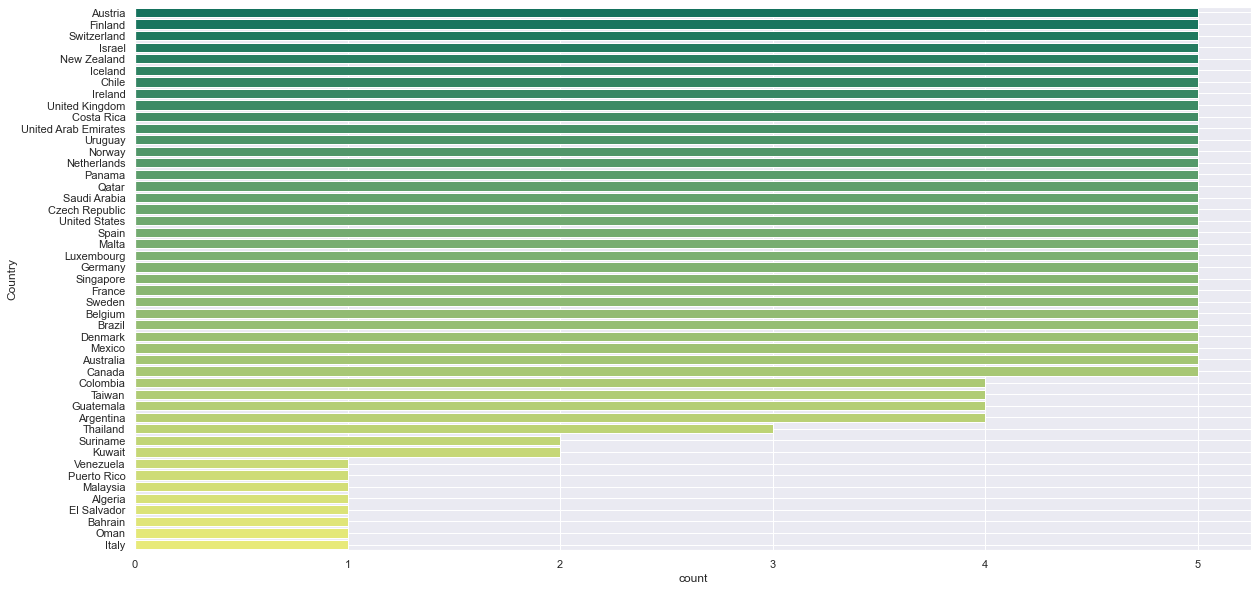

In [41]:
plt.figure(figsize=(20, 10))
sns.countplot(y='Country', data=high, palette='summer', order=high['Country'].value_counts().index)
plt.grid(True)
plt.show()

## **Insight**

There are 8 countries that only occur once in this group, they are:

- Italy
- El Salvador
- Malaysia
- Algeria
- Bahrain
- Oman
- Venezuela
- Puerto Rico

Next is to find out things that are done by these countries to make a breakthrough to enter group with high Happiness Score, and/or to find out things that make these countries exit the group (with high Happiness Score).

Some countries only recorded one time (only one year), so it's needed to evaluate these countries from the original data.

In [42]:
# df[(df['Country'] == 'Italy') | (df['Country'] == 'El Salvador') | (df['Country'] == 'Malaysia') | (df['Country'] == 'Algeria') | (df['Country'] == 'Bahrain') | (df['Country'] == 'Oman') | (df['Country'] == 'Venezuela') | (df['Country'] == 'Puerto Rico')]['Country'].value_counts()

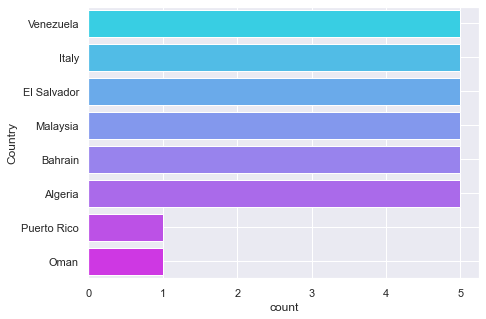

In [43]:
plt.figure(figsize=(7, 5))
sns.countplot(y='Country', data=df[(df['Country'] == 'Italy') | (df['Country'] == 'El Salvador') | (df['Country'] == 'Malaysia') | (df['Country'] == 'Algeria') | (df['Country'] == 'Bahrain') | (df['Country'] == 'Oman') | (df['Country'] == 'Venezuela') | (df['Country'] == 'Puerto Rico')], palette='cool', order=df[(df['Country'] == 'Italy') | (df['Country'] == 'El Salvador') | (df['Country'] == 'Malaysia') | (df['Country'] == 'Algeria') | (df['Country'] == 'Bahrain') | (df['Country'] == 'Oman') | (df['Country'] == 'Venezuela') | (df['Country'] == 'Puerto Rico')]['Country'].value_counts().index)
plt.grid(True)
plt.show()

In [44]:
high[(high['Country'] == 'Oman') | (high['Country'] == 'Puerto Rico')]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
21,Oman,Middle East and Northern Africa,22,6.853,1.36011,1.08182,0.76276,0.63274,0.21542,0.32524,2015
14,Puerto Rico,Latin America and Caribbean,15,7.039,1.35943,1.08113,0.77758,0.46823,0.22202,0.12275,2016


Since the record only has Oman and Puerto Rico's data just for 1 year, they are excluded from this part of analysis.

In [45]:
high[(high['Country'] == 'Bahrain') | (high['Country'] == 'Algeria') | (high['Country'] == 'Malaysia') | (high['Country'] == 'El Salvador') | (high['Country'] == 'Italy') | (high['Country'] == 'Venezuela')]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
22,Venezuela,Latin America and Caribbean,23,6.810,1.04424,1.25596,0.72052,0.42908,0.05841,0.11069,2015
37,Algeria,Middle East and Northern Africa,38,6.355,1.05266,0.83309,0.61804,0.21006,0.07044,0.16157,2016
41,Bahrain,Middle East and Northern Africa,42,6.218,1.44024,0.94397,0.65696,0.47375,0.17147,0.25772,2016
57,Malaysia,Southeastern Asia,35,6.322,1.16100,1.25800,0.66900,0.35600,0.31100,0.05900,2018
38,El Salvador,Latin America and Caribbean,35,6.253,0.79400,1.24200,0.78900,0.43000,0.09300,0.07400,2019
46,Italy,Western Europe,36,6.223,1.29400,1.48800,1.03900,0.23100,0.15800,0.03000,2019


Italy and El Salvador entered the group of high Happiness Score in 2019. What are things done differently by this 2 countries that made them suceessful in improving their happiness score?


In [141]:
ita_els = df[((df['Country'] == 'El Salvador') | (df['Country'] == 'Italy')) & ((df['Year'] == 2018) | (df['Year'] == 2019))]

In [142]:
ita_els.groupby(['Country', 'Year'])['Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'].mean()

Happiness Rank  Happiness Score  GDP per Capita  \
Country     Year                                                    
El Salvador 2018              40            6.167           0.806   
            2019              35            6.253           0.794   
Italy       2018              47            6.000           1.264   
            2019              36            6.223           1.294   

                  Social support  Healthy life expectancy  \
Country     Year                                            
El Salvador 2018           1.231                    0.639   
            2019           1.242                    0.789   
Italy       2018           1.501                    0.946   
            2019           1.488                    1.039   

                  Freedom to make life choices  Generosity  \
Country     Year                                             
El Salvador 2018                         0.461       0.065   
            2019                         0.430       0.093   
Italy       2018                         0.281       0.137   
            2019                         0.231       0.158   

                  Perceptions of corruption  
Country     Year                             
El Salvador 2018                      0.082  
            2019                      0.074  
Italy       2018                      0.028  
            2019                      0.030

## **Insights**

Italy made higher performance in improving their Happiness Score, than El Salvador. It can be seen from their scores. Italy jumped from Rank 47 to Rank 36, while El Salvador rose from Rank 40 to 35.

Both countries managed to improve their effort in healthy life expectancy and generosity aspects. Italy also improve its GDP per Capita, while El Salvador's score on GDP per Capita down a little.

=====================================================================================================================

In [48]:
df[(df['Country'] == 'Malaysia') & ((df['Year'] == 2019))]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
57,Malaysia,Southeastern Asia,80,5.339,1.221,1.171,0.828,0.508,0.26,0.024,2019


### Why Malaysia's rank drop substantially from rank 35 in 2018 and rank 80 in 2019?


In [49]:
df[(df['Country'] == 'Malaysia') & ((df['Year'] == 2019) | (df['Year'] == 2018))]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
57,Malaysia,Southeastern Asia,35,6.322,1.161,1.258,0.669,0.356,0.311,0.059,2018
57,Malaysia,Southeastern Asia,80,5.339,1.221,1.171,0.828,0.508,0.260,0.024,2019


In [50]:
mys = df[df['Country'] == 'Malaysia']

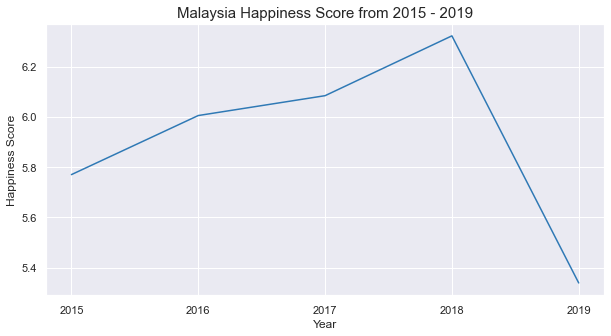

In [51]:
plt.figure(figsize=(10, 5))
g = sns.lineplot(x='Year', y='Happiness Score', data=mys)
g.set_xticks(range(2015, 2020, 1))
plt.title('Malaysia Happiness Score from 2015 - 2019', size=15)
plt.show()

The Malaysia's Happiness Score dropped significantly from 6.322 in 2018 to 5.339 in 2019, whereas they successfully improve their GDP per Capita, healthy life expectancy, and freedom to make life choices. It happened beacause they drop their score on other features such as Social support, generosity, and perception of corruption (Government Trust).

========================================================================================================================

### ** Analysis on Regions in Group of Countries Having High Happiness Score **

In [52]:
high['Region'].value_counts()

Western Europe                     81
Latin America and Caribbean        47
Middle East and Northern Africa    25
North America                      10
Australia and New Zealand          10
Southeastern Asia                   9
Central and Eastern Europe          5
Eastern Asia                        4
Name: Region, dtype: int64

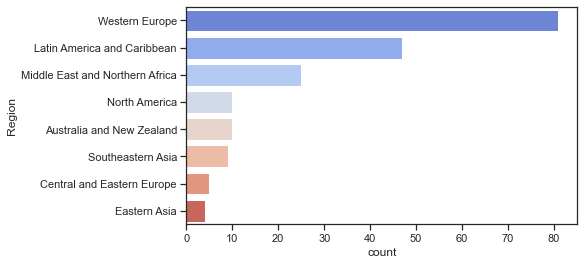

In [149]:
plt.figure(figsize=(7, 4))
sns.countplot(y='Region', data=high, palette='coolwarm', order=high['Region'].value_counts().index)
plt.show()

#### Western Europe being the region mentioned most often in group of countries having high happiness score

In [53]:
high[high['Region'] == 'Western Europe']['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland',
       'Netherlands', 'Sweden', 'Austria', 'Luxembourg', 'Ireland',
       'Belgium', 'United Kingdom', 'Germany', 'France', 'Spain', 'Malta',
       'Italy'], dtype=object)

The Western Europe countries in this group are:

- Switzerland,
- Iceland,
- Denmark,
- Norway, 
- Finland,
- Netherlands, 
- Sweden,
- Austria,
- Luxembourg,
- Ireland,
- Belgium,
- United Kingdom,
- Germany,
- France,
- Spain,
- Malta,
- Italy

Of all countries mentioned above, Italy is the only country that listed in this group for one time (as discussed earlier)

In [54]:
high[high['Happiness Rank'] == 1]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2015
0,Denmark,Western Europe,1,7.526,1.441780,1.163740,0.795040,0.579410,0.361710,0.444530,2016
3,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
5,Finland,Western Europe,1,7.632,1.305000,1.592000,0.874000,0.681000,0.202000,0.393000,2018
5,Finland,Western Europe,1,7.769,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,2019


From 2015 to 2019, number 1 rank on World Happiness Score are 0all achieved by Western Europe countries, they are: Switzerland, Denmark, Norway, and Finland (2 years back to back)

In [64]:
df.drop(columns=['Year', 'Happiness Score']).groupby('Region').agg(['max', 'min', 'median'])

Happiness Rank            GDP per Capita  \
                                           max min median            max   
Region                                                                     
Australia and New Zealand                   11   8    9.0       1.484415   
Central and Eastern Europe                 138  20   73.0       1.352682   
Eastern Asia                               101  25   65.0       1.510700   
Latin America and Caribbean                148  12   43.0       1.361356   
Middle East and Northern Africa            156  11   83.0       2.096000   
North America                               19   5   11.0       1.546259   
Southeastern Asia                          145  22   81.5       1.692278   
Southern Asia                              154  67  115.0       1.009850   
Sub-Saharan Africa                         158  55  132.0       1.198210   
Western Europe                             102   1   17.0       1.741944   

                                                   Social support           \
                                     min    median            max      min   
Region                                                                       
Australia and New Zealand        1.25018  1.350330       1.601000  1.10476   
Central and Eastern Europe       0.39047  1.065789       1.584000  0.19249   
Eastern Asia                     0.82819  1.292490       1.531000  0.72194   
Latin America and Caribbean      0.26673  0.981240       1.522000  0.29561   
Middle East and Northern Africa  0.28700  1.055830       1.559000  0.14866   
North America                    1.32629  1.415500       1.532000  1.04782   
Southeastern Asia                0.27108  0.809585       1.463000  0.53750   
Southern Asia                    0.31982  0.652000       1.340127  0.11037   
Sub-Saharan Africa               0.00000  0.376923       1.410000  0.00000   
Western Europe                   1.15400  1.354950       1.644000  0.70697   

                                          Healthy life expectancy            \
                                   median                     max       min   
Region                                                                        
Australia and New Zealand        1.529021                   1.036  0.816760   
Central and Eastern Europe       1.222840                   0.953  0.437726   
Eastern Asia                     1.182419                   1.122  0.554690   
Latin America and Caribbean      1.236000                   0.963  0.274940   
Middle East and Northern Africa  1.032000                   1.029  0.310081   
North America                    1.438460                   1.039  0.774287   
Southeastern Asia                1.122618                   1.141  0.382910   
Southern Asia                    0.810000                   0.831  0.173440   
Sub-Saharan Africa               0.889335                   0.798  0.000000   
Western Europe                   1.428939                   1.062  0.792566   

                                          Freedom to make life choices  \
                                   median                          max   
Region                                                                   
Australia and New Zealand        0.892185                      0.66900   
Central and Eastern Europe       0.700644                      0.72400   
Eastern Asia                     0.896607                      0.59700   
Latin America and Caribbean      0.690770                      0.63376   
Middle East and Northern Africa  0.664575                      0.65400   
North America                    0.848174                      0.65300   
Southeastern Asia                0.630330                      0.69600   
Southern Asia                    0.527000                      0.58500   
Sub-Saharan Africa               0.290439                      0.63600   
Western Europe                   0.884000                      0.68600   

                                     

In order to analyse factors making Western Europe region different from other regions (having more countries with higher happiness score), comparison will be done with group of countries in quantile 1 (25%)

Q3 is group with Happiness Score lower and equal to 4.5

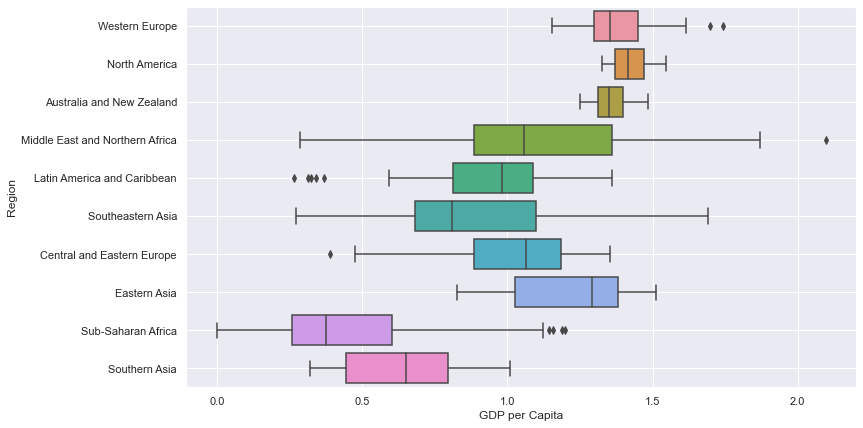

In [124]:
plt.figure(figsize=(12, 7))
g = sns.boxplot(x='GDP per Capita', y='Region', data=df)
plt.grid(True)
plt.show()

### **Insights**

Region with overall high-range in GDP per Capita feature is Nort America, while the maximum GDP per Capita found in Middle East and Northern Africa region, also Western Europe. So it can be seen that eventhough there are some regions where GDP per Capita is higher, there are probably other features that correspond to overall high-happiness score in Western Europe; The GDP per Capita is not the main reason for the rate of Happiness of a country's citizen.

Whilst in Sub-Saharan Africa, GDP per Capita is the lowest of all regions, and Sub-Saharan Africa has most countries in 25% quantile.

During the course of the 1950s - 1970s, development was predominantly gauged by Gains in per Capita (GNP) growth (Onyiriuba, 2016 (source: https://www.sciencedirect.com/topics/social-sciences/developing-countries)). It was expected that increases in GNP would translate into jobs, economic opportunities, and a wider distribution of socioeconomic benefits (Onyiriuba, 2016 (https://www.sciencedirect.com/topics/social-sciences/developing-countries)). While GNP itself corresponds to GDP (source: https://www.investopedia.com/ask/answers/033015/what-formula-calculating-gross-national-product-gdp.asp).

This makes it clear why countries in Sub-Saharan Africa place last rank on world-wide Happiness Score. They (countries in Sub-Saharan Africa) might not having much job opportunities, economic opportunities, as well as other socioeconomic benefits from it.

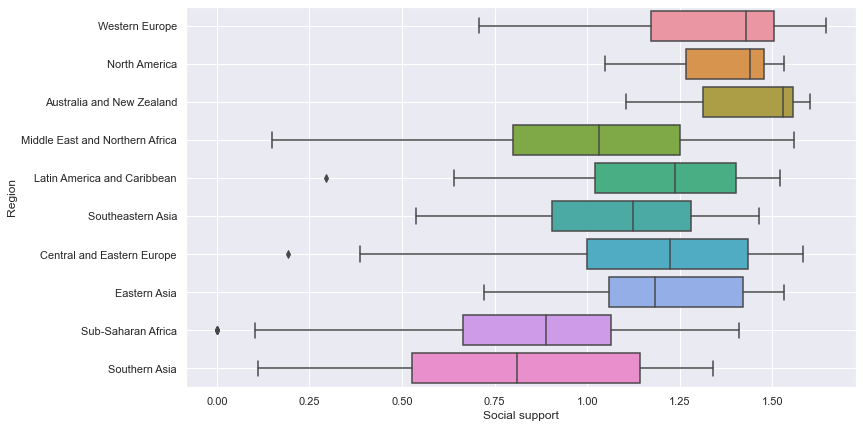

In [126]:
plt.figure(figsize=(12, 7))
g = sns.boxplot(x='Social support', y='Region', data=df)
plt.grid(True)
plt.show()

### **Insights**

Community and family-based social support networks refer to physical and positive emotional support given by family, friends, co-workers, etc (WHO, 2015. Source: https://www.who.int/mental_health/mhgap/evidence/resource/suicide_q5.pdf?ua=1). This support can also be defined as any information leadning an individual to believe he or she is cared for, loved, valued, and a member of a social network. Any ways of social supports is beneficial to prevent person having plans or thoughts of self-harm. Simply put, "if someone is happy and feels that they're worth, they won't hurt him/herself".

Boxplot above shows that even in general countries in Southern Asia region have lower range of social support, the minimum value of social support happens in Sub-Saharan Africa. While in Western Europe, Australia and New Zealand, and North American regions, the value of social support are high among other regions.

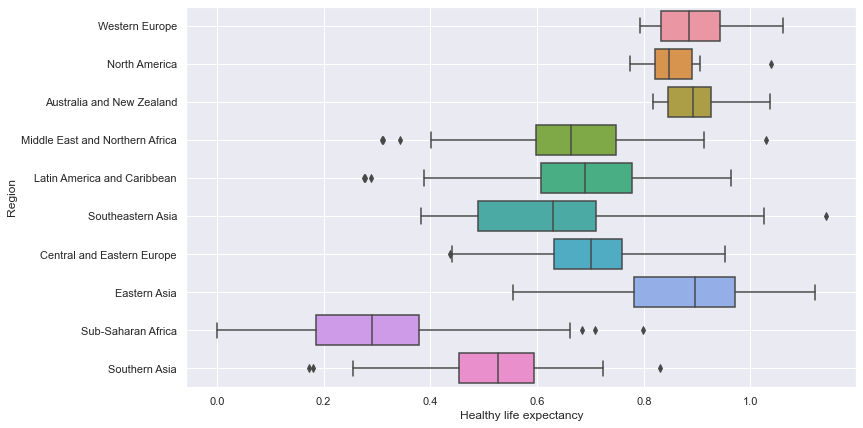

In [127]:
plt.figure(figsize=(12, 7))
g = sns.boxplot(x='Healthy life expectancy', y='Region', data=df)
plt.grid(True)
plt.show()

### **Insights**

Healthy life expectancy (HALE) is a measurement used by the World Health Organization (WHO) in assessing the health and well-being of a country. This feature is used, among other, to evaluate existing health programs. The data is used by public health officials in creating policies to address inequalities in health programs and services across different regions (Source: Centers for Disease COntrol and Prevention (CDC)). 

From this data, we can gain information about health-related factors, such as healthcare access and facilities, healthcare treatment, healthcare workers and other medical proffesionals, etc. Low score on healthy life expectancy means existing health facilities and program needs a lot of improvement, as seen on Sub-Saharan Africa region.

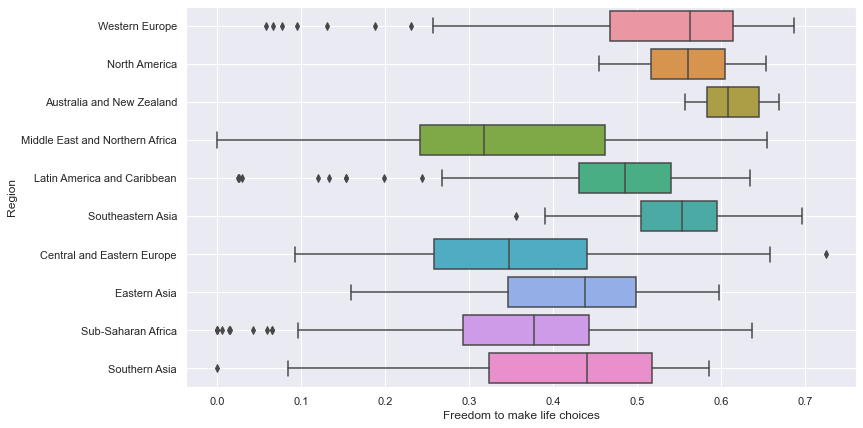

In [128]:
plt.figure(figsize=(12, 7))
g = sns.boxplot(x='Freedom to make life choices', y='Region', data=df)
plt.grid(True)
plt.show()

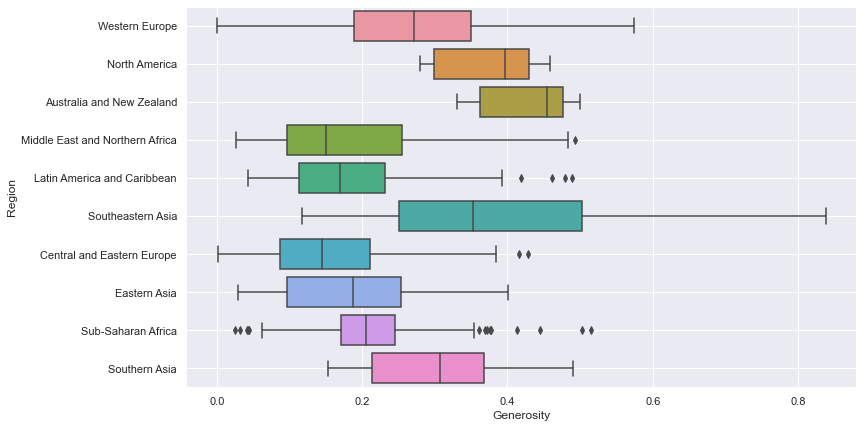

In [129]:
plt.figure(figsize=(12, 7))
g = sns.boxplot(x='Generosity', y='Region', data=df)
plt.grid(True)
plt.show()

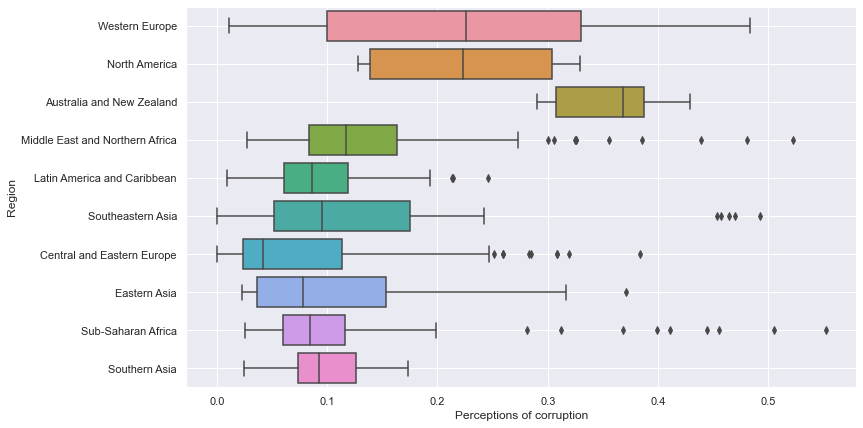

In [132]:
plt.figure(figsize=(12, 7))
g = sns.boxplot(x='Perceptions of corruption', y='Region', data=df)
plt.grid(True)
plt.show()

## **Insights**

According to World Happiness Report (Source: https://worldhappiness.report/ed/2019/changing-world-happiness/)
Freedom to make life choices is the national average of binary responses to the GWP (Gallup World Poll) question 'Are you satisfied or dissatisfied with your freedom to choose what you do with your life?"

Generosity is the residual of regressing the national average of GWP responses to the question "have you donated money to a charity in the past month?" on GDP per Capita

Perceptions of corruption are the average of binary answers to two GWP questions: "is corruption widespread throughout the government or not?" and "Is  corruption widespread within businesses or not?" Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.

A positive emotions play a strong role in support of life evaluatins, and that much of the impact of freedom and generosity on life evaluations is channeled through their influence on positive emotions. that is, freedom and generosity have large impacts on positive affect, which in turn has a major impact on life evaluations (Source: World Happiness Report https://worldhappiness.report/ed/2019/changing-world-happiness/).

=====================================================================================

## **Analysis**

In general, GDP per Capita is the main thing that determines happiness index of a country. Countries already having high GDP per Capita value might need other factors such as healthy life expectancy, social support, freedom to make life choices, generosity, and perceptions of corruption. But GDP per Capita is the primary thing that must be prioritized. Because when GDP is low, workers may be retrenched and/or paid lower wages, and it will result in domino effect to other socioeconomic sectors which furthermore will also (indirectly) affects the healthy life expectancy and overall public welfare.

=====================================================================================

# **Conclusion**

1. Based on pearson correlation method, factors contribute to Happiness Score are: GDP per Capita, Healthy life expectancy, Social support, and Freedom to make life choices. All features are positively correlated with overall Happiness Score.
2. Western Europe has most countries ranked in quantile 75 of Happiness Score, while Sub-Saharan Africa countries are most likely to be found on quantile 25. 
3. GDP per Capita is the main thing that determines happiness index of a country, so it must be the primary thing to prioritized to improve the overall public welfare of a country.

# **Suggestions**

Efforts to improve purchasing power of the community and economic activity can be done by giving economic stimulation to excite microeconomics in the community such as "Koperasi" in Indonesia (Cooperative).

Improving tourism business also can be done to attract foreign tourist therefore it could increase economic transaction in the community.

=====================================================================================

In [133]:
# machine learning preparation

df.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
